<a href="https://colab.research.google.com/github/harishmohan83/text-util-service/blob/master/assignment3_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sea

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve



for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/assignment1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment1/diabetes.csv')

# print(list(df.columns))
# df.head(5)

/content/drive/MyDrive/Colab Notebooks/assignment1/diabetes.csv
/content/drive/MyDrive/Colab Notebooks/assignment1/.DS_Store
/content/drive/MyDrive/Colab Notebooks/assignment1/winequality-white.csv
/content/drive/MyDrive/Colab Notebooks/assignment1/winequality-red.csv


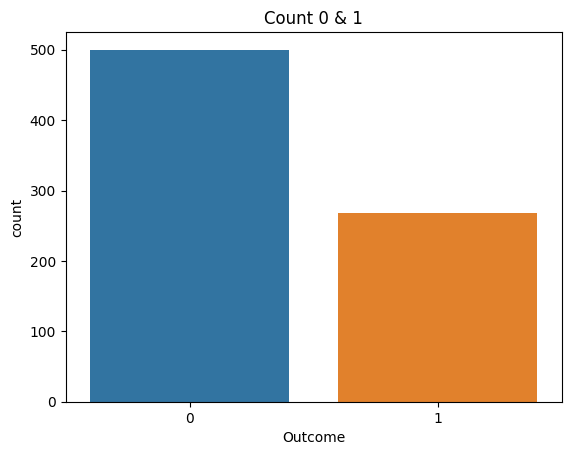

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [2]:
pd.options.mode.chained_assignment = None

sea.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

data_X = data.loc[:, data.columns != "Outcome"]
data_Y = data[["Outcome"]]
# data_X = data_X.drop(['Outcome'], axis = 1)
data_X.head()

In [3]:
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size = 0.2, stratify=data_Y, random_state = 0)
train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

# test_X.head()

In [4]:
def plots(feature):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])
    sea.histplot(train_X.loc[train_Y["Outcome"]==0,feature],
                 kde = False, color = "#004a4d",
                  bins=40,
                 label="Not Diabetes", ax=ax1);
    sea.histplot(train_X.loc[train_Y["Outcome"]==1,feature],
                 kde = False, color = "#7d0101",
                 bins=40,
                 label="Diabetes", ax=ax1);
    ax2 = fig.add_subplot(gs[0,3])
    sea.boxplot(train_X[feature], orient="v", color = "#989100",
                width = 0.2, ax=ax2);

    ax1.legend(loc="upper right");

sea.set_style("darkgrid")

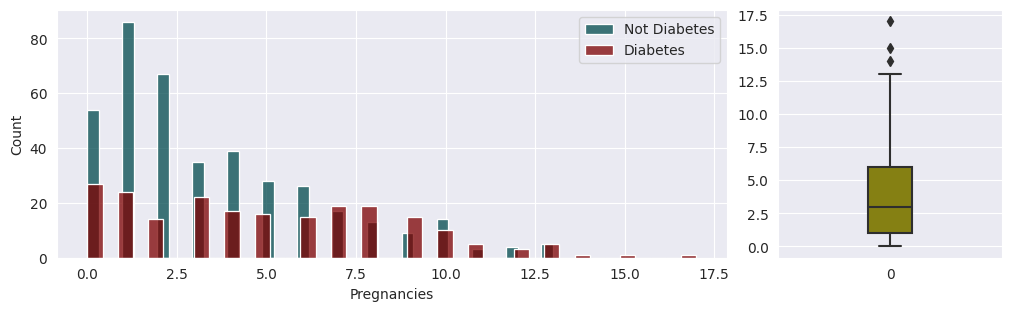

In [5]:
plots("Pregnancies")

In [6]:
Q1 = train_X["Pregnancies"].quantile(0.25)
Q3 = train_X["Pregnancies"].quantile(0.75)
q95th = train_X["Pregnancies"].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Pregnancies"] = np.where(train_X["Pregnancies"] > UW,
                                  q95th, train_X["Pregnancies"])

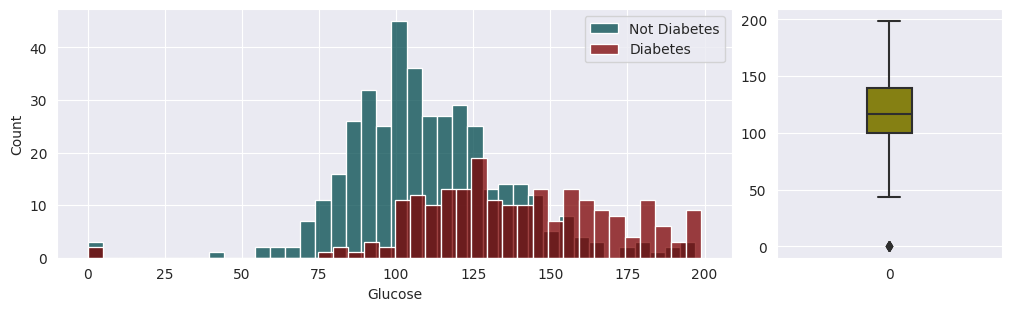

In [7]:
plots("Glucose")

In [8]:
med = train_X["Glucose"].median()
train_X["Glucose"] = np.where(train_X["Glucose"] == 0, med, train_X["Glucose"])

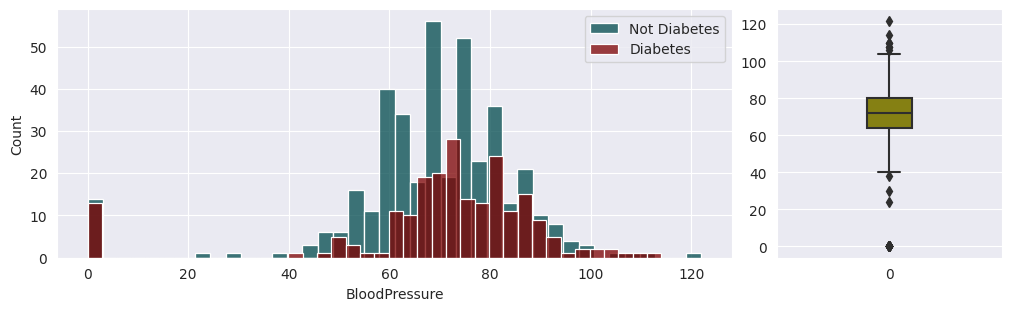

In [9]:
plots("BloodPressure")

In [10]:
med = train_X["BloodPressure"].median()
q5th = train_X["BloodPressure"].quantile(0.05)
q95th = train_X["BloodPressure"].quantile(0.95)
Q1 = train_X["BloodPressure"].quantile(0.25)
Q3 = train_X["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5*IQR
UW = Q3 + 1.5*IQR

train_X["BloodPressure"] = np.where(train_X["BloodPressure"] == 0,
                                    med, train_X["BloodPressure"])
train_X["BloodPressure"] = np.where(train_X["BloodPressure"] < LW,
                                    q5th, train_X["BloodPressure"])
train_X["BloodPressure"] = np.where(train_X["BloodPressure"] > UW,
                                    q95th, train_X["BloodPressure"])

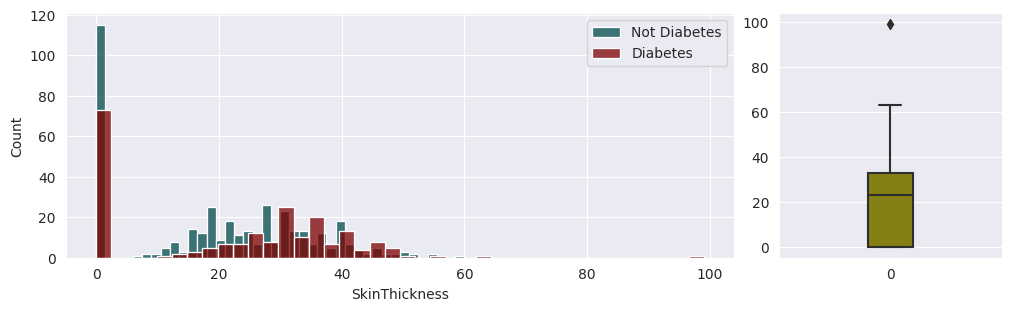

In [11]:
plots("SkinThickness")

In [12]:
med = train_X["SkinThickness"].median()
q95th = train_X["SkinThickness"].quantile(0.95)
Q1 = train_X["SkinThickness"].quantile(0.25)
Q3 = train_X["SkinThickness"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["SkinThickness"] = np.where(train_X["SkinThickness"] == 0,
                                    med, train_X["SkinThickness"])
train_X["SkinThickness"] = np.where(train_X["SkinThickness"] > UW,
                                    q95th, train_X["SkinThickness"])

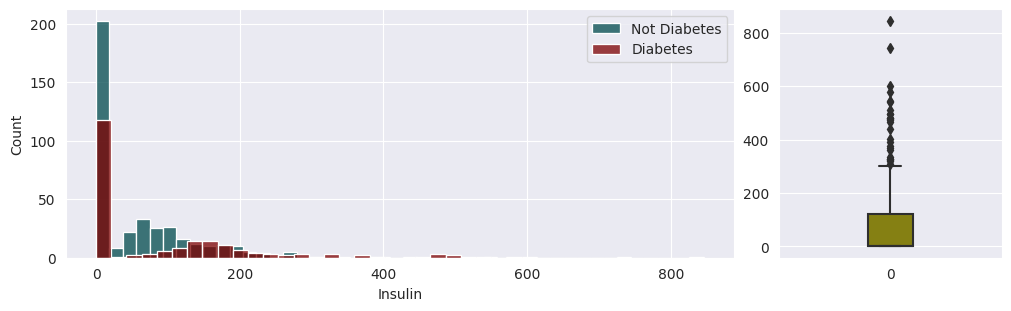

In [13]:
plots("Insulin")

In [14]:
q60th = train_X["Insulin"].quantile(0.60)
q95th = train_X["Insulin"].quantile(0.95)
Q1 = train_X["Insulin"].quantile(0.25)
Q3 = train_X["Insulin"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Insulin"] = np.where(train_X["Insulin"] == 0,
                              q60th, train_X["Insulin"])
train_X["Insulin"] = np.where(train_X["Insulin"] > UW,
                              q95th, train_X["Insulin"])

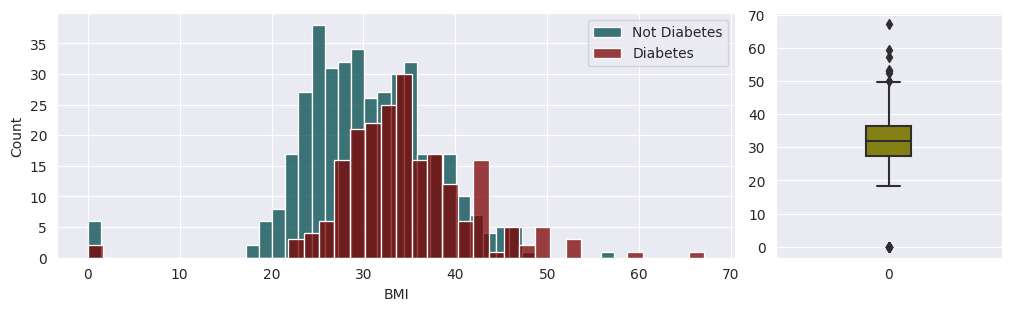

In [15]:
plots("BMI")

In [16]:
med = train_X["BMI"].median()
q95th = train_X["BMI"].quantile(0.95)
Q1 = train_X["BMI"].quantile(0.25)
Q3 = train_X["BMI"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["BMI"] = np.where(train_X["BMI"] == 0,
                          med, train_X["BMI"])
train_X["BMI"] = np.where(train_X["BMI"] > UW,
                          q95th, train_X["BMI"])

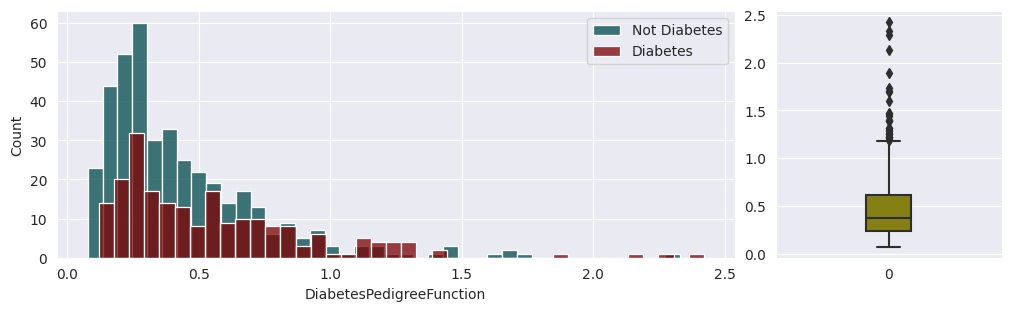

In [17]:
plots("DiabetesPedigreeFunction")

In [18]:
q95th = train_X["DiabetesPedigreeFunction"].quantile(0.95)
Q1 = train_X["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = train_X["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["DiabetesPedigreeFunction"] = np.where(
                        train_X["DiabetesPedigreeFunction"] > UW,
                        q95th, train_X["DiabetesPedigreeFunction"])

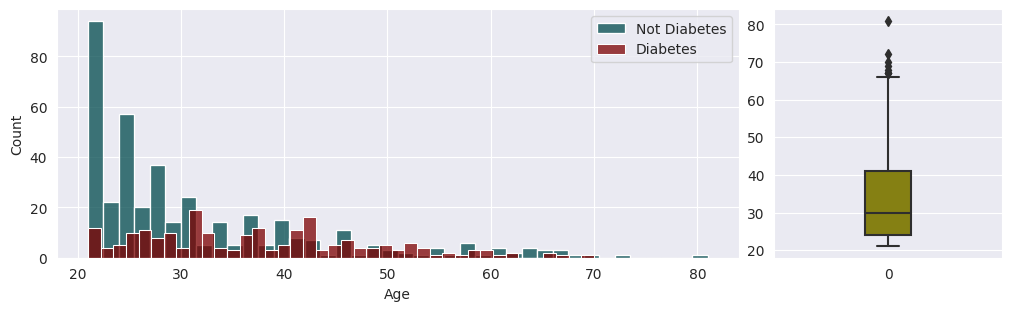

In [19]:
plots("Age")

In [20]:
q95th = train_X["Age"].quantile(0.95)
Q1 = train_X["Age"].quantile(0.25)
Q3 = train_X["Age"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Age"] = np.where(train_X["Age"] > UW,
                          q95th, train_X["Age"])

In [21]:
# df_copy = df.copy(deep = True)
# df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# ## showing the count of Nans
# print(df_copy.isnull().sum())
# df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
# df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
# df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
# df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
# df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

In [22]:

# feature_names = train_X.columns

# scaler = StandardScaler()

# # fit to train_X
# scaler.fit(train_X)

# # transform train_X
# train_X = scaler.transform(train_X)
# train_X = pd.DataFrame(train_X, columns = feature_names)

# # transform test_X
# test_X = scaler.transform(test_X)
# test_X = pd.DataFrame(test_X, columns = feature_names)
# test_X.head()

In [23]:
# from sklearn.preprocessing import MinMaxScaler
feature_names = train_X.columns
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
train_X = pd.DataFrame(train_X, columns = feature_names)

test_X = scaler.transform(test_X)
test_X = pd.DataFrame(test_X, columns = feature_names)
test_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.582151,-2.190844,-1.431525,0.051701,-0.858602,-1.261128,-0.451798,-0.995265
1,-0.879770,-0.989136,-0.912344,-0.283625,-0.921169,-1.999890,0.072111,-0.733473
2,-0.879770,-0.722090,0.126018,-1.736705,-0.842961,-1.999890,-1.090967,-0.471681
3,0.905945,-0.822232,0.299079,0.498802,-0.139082,1.363835,1.430781,-0.122624
4,0.608326,0.980329,-0.912344,0.387027,0.314529,0.515044,0.805583,-0.471681


<ipython-input-70-886c8cdad736>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))


Text(0.5, 1.0, 'Diabetes Dataset')

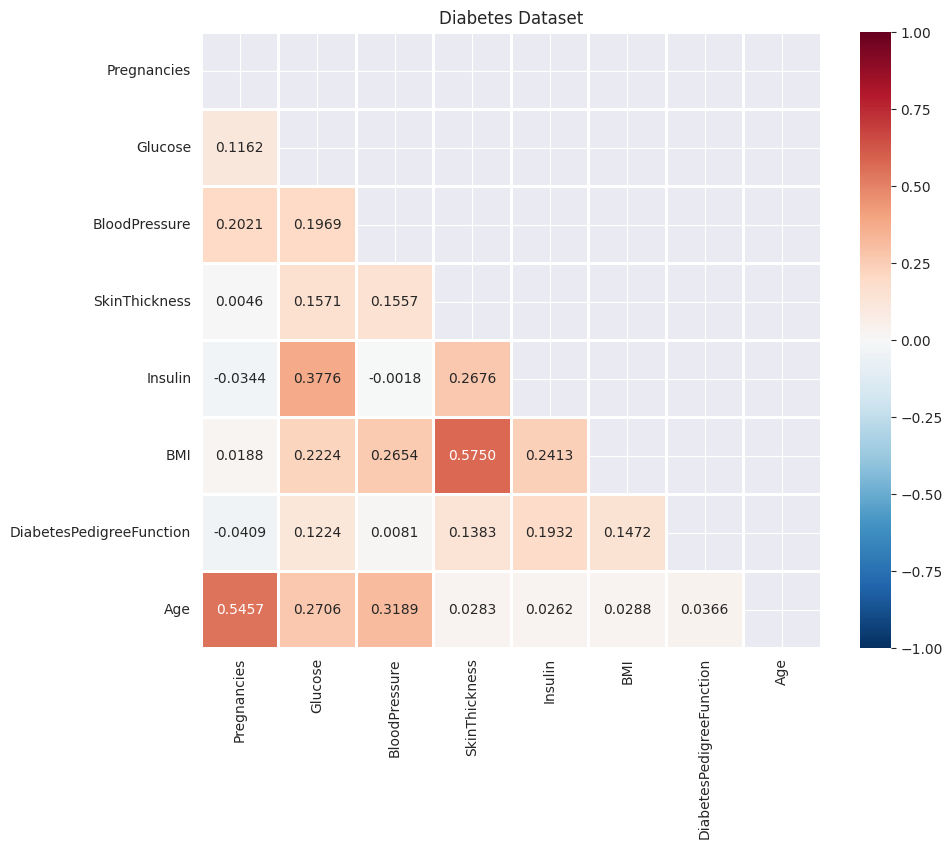

In [70]:
corr_matrix = pd.concat([train_X], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(10,8))
sea.heatmap(corr_matrix,annot=True, fmt=".4f",
            vmin=-1, vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="RdBu_r");
plt.title("Diabetes Dataset")

<ipython-input-25-d1bb74f218d6>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))


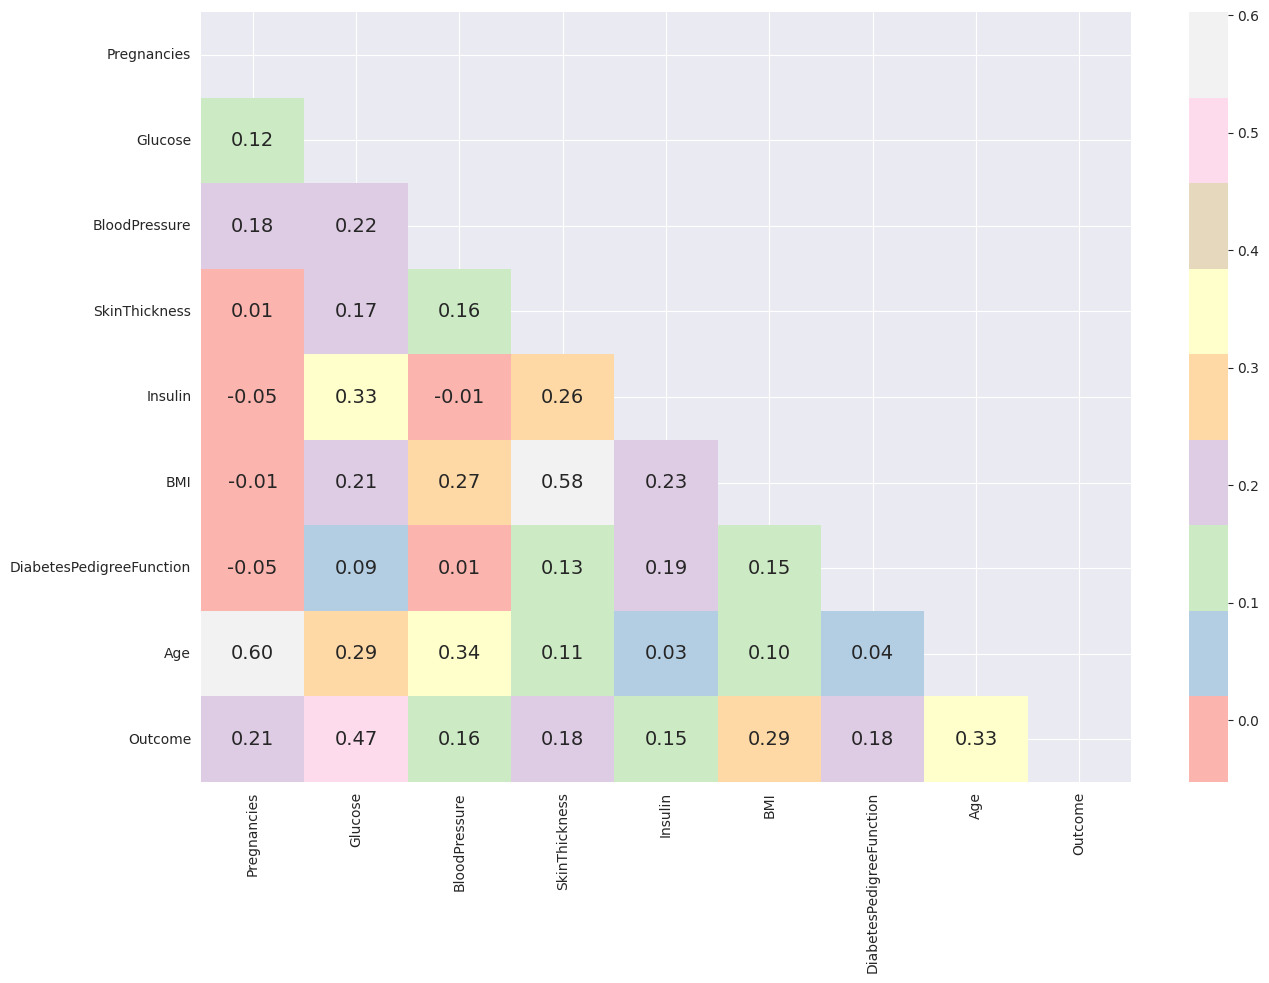

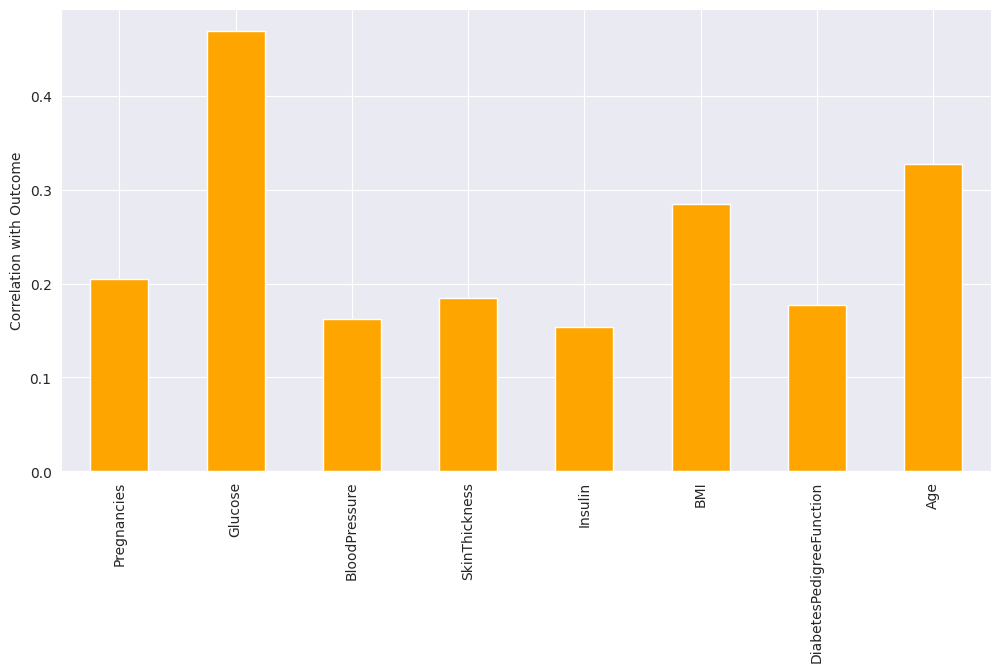

In [25]:
corr_matrix = pd.concat([train_X, train_Y], axis=1).corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(15,10))
sea.heatmap(corr_matrix,
            annot=True, annot_kws={'size':14},
            fmt='.2f', cmap='Pastel1',
            mask=np.triu(corr_matrix))
plt.show()

corr_matrix['Outcome'][:-1].plot.bar(color='orange', figsize=(12,6))
plt.ylabel("Correlation with Outcome")
plt.show()

Text(0.5, 1.0, 'Diabetes Dataset Pair Plot')

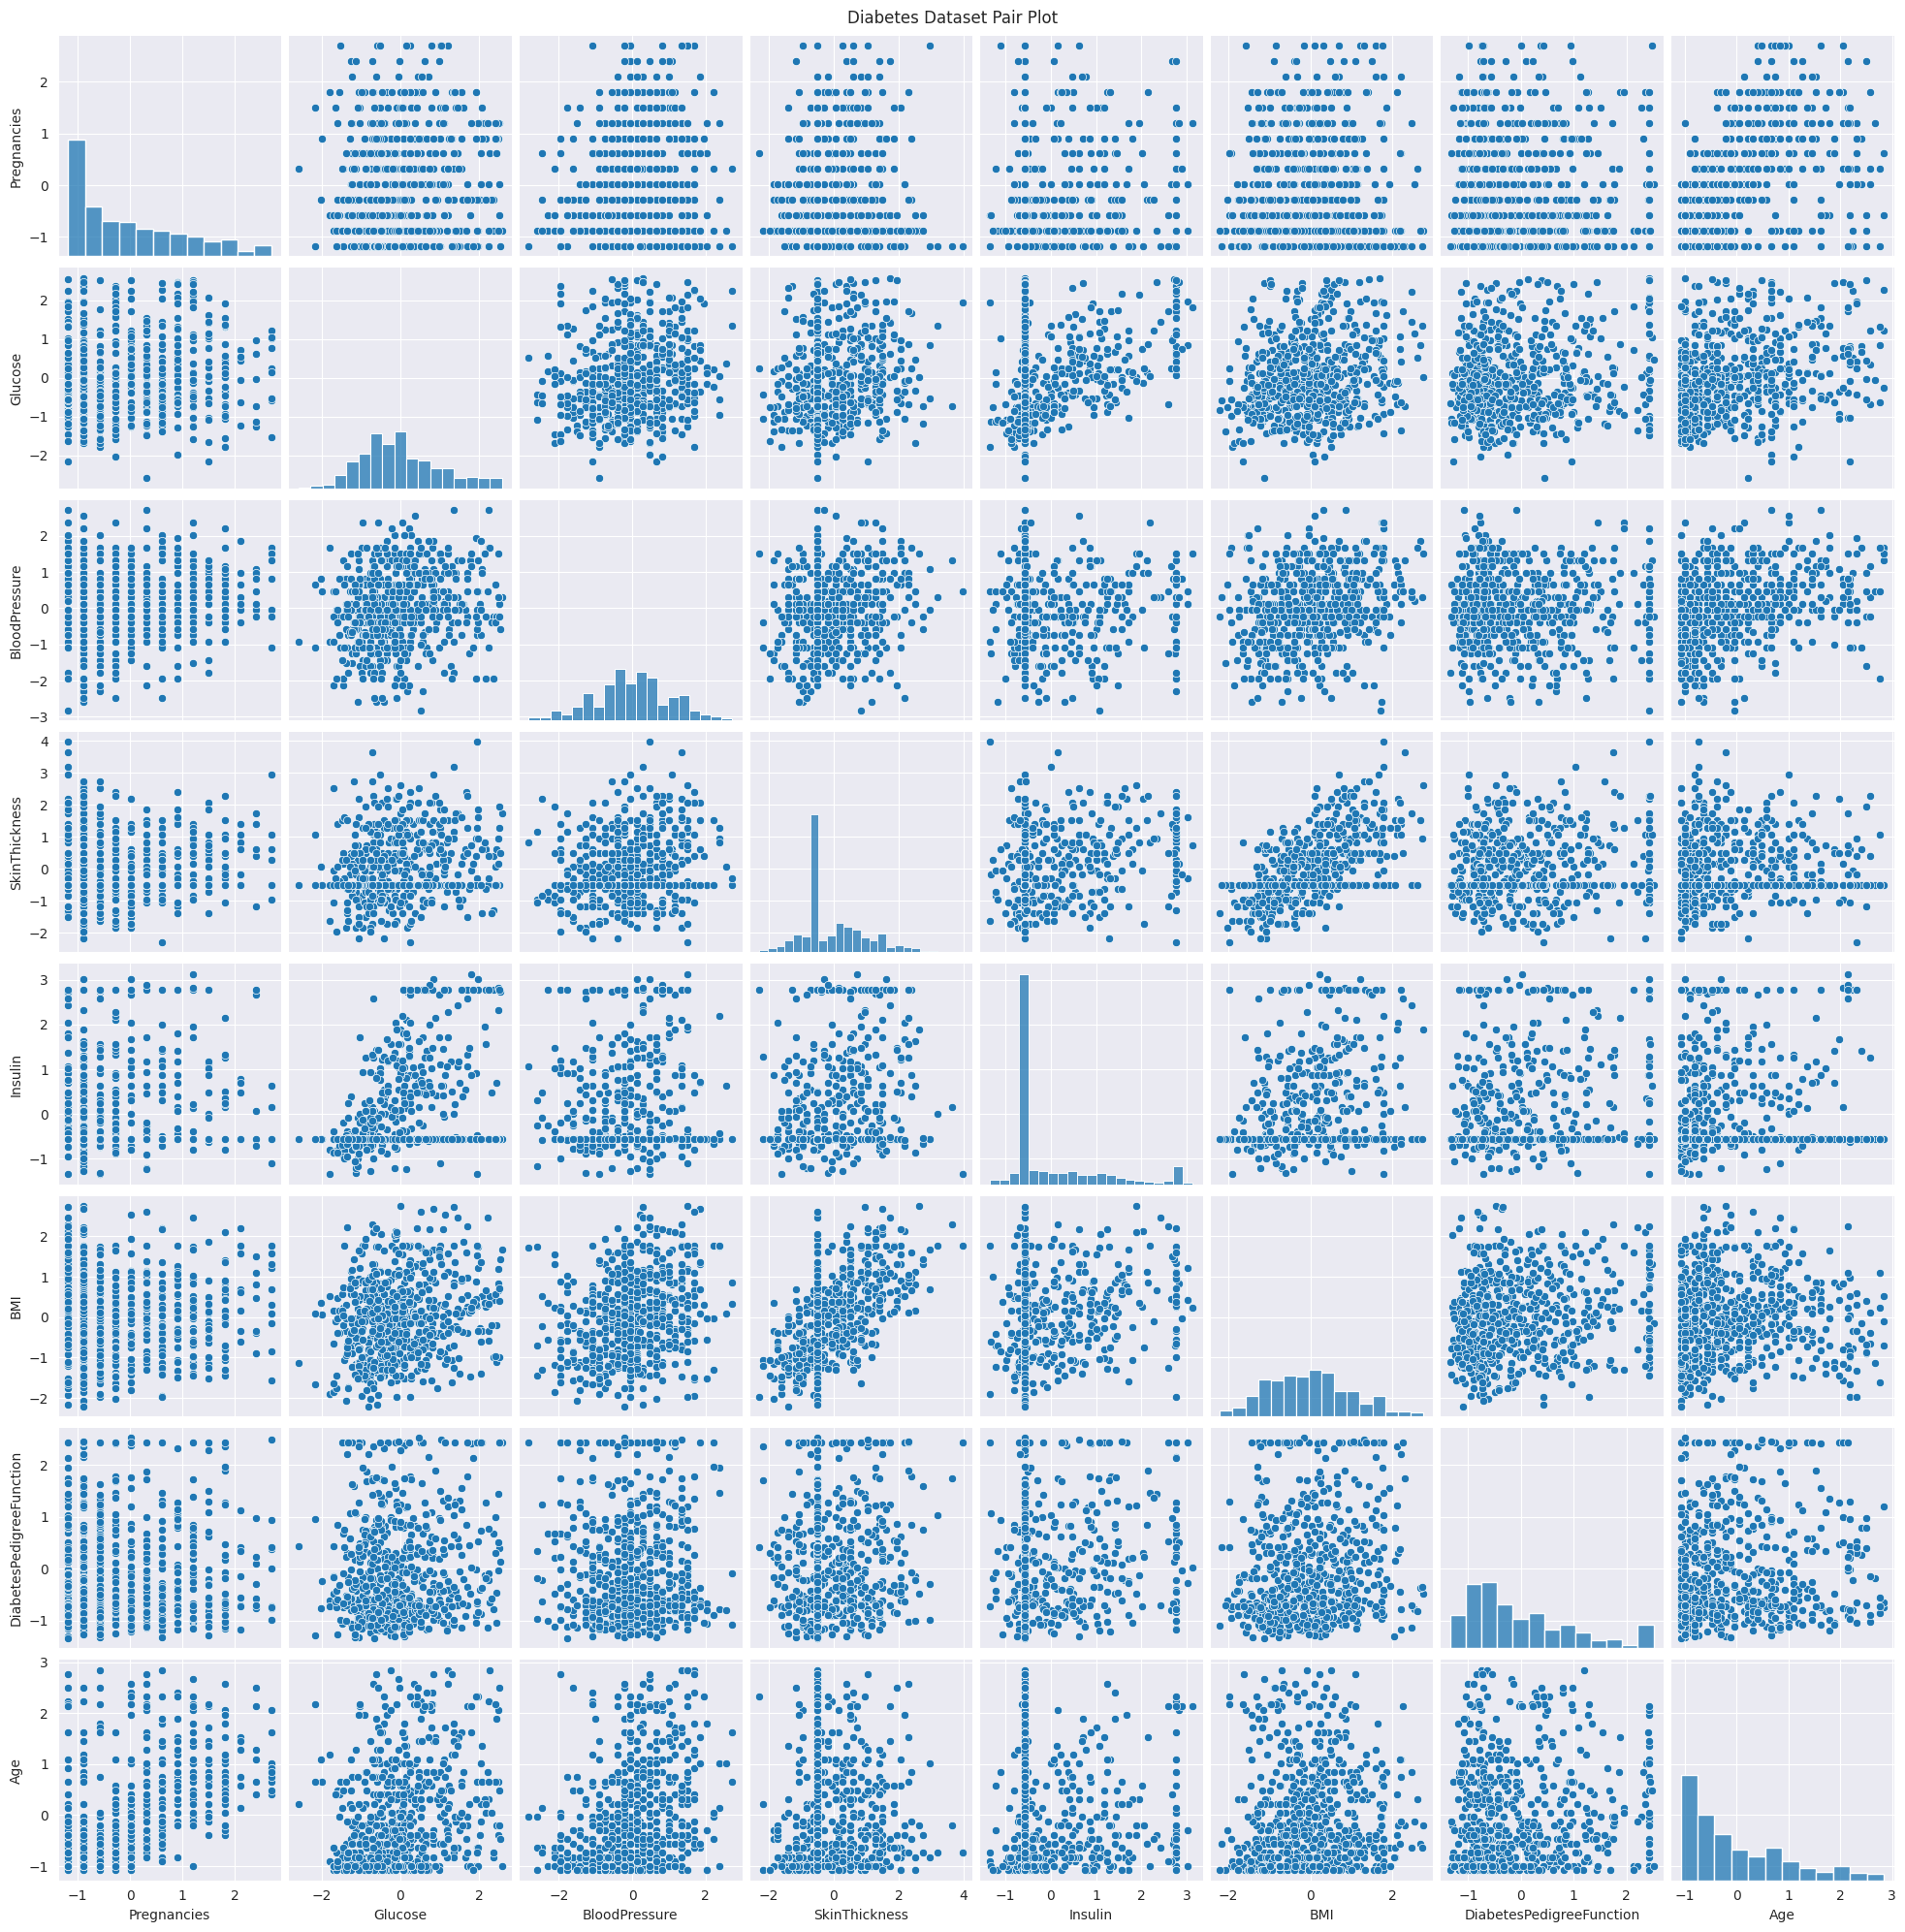

In [68]:
df = pd.concat([train_X, train_Y], axis=1)
pairplot = sea.pairplot(train_X)
pairplot.fig.suptitle("Diabetes Dataset Pair Plot", y=1.00)
# sea.pairplot(df, hue = 'Outcome')


In [27]:
# train_X.drop("SkinThickness", axis=1, inplace=True)
# test_X.drop("SkinThickness", axis=1, inplace=True)

In [28]:
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from sklearn.manifold import Isomap
from sklearn.decomposition import KernelPCA


Parameter: {'n_clusters': 2} Score 0.18198340055458148
Parameter: {'n_clusters': 3} Score 0.19777639860600507
Parameter: {'n_clusters': 4} Score 0.1717543473128096
Parameter: {'n_clusters': 5} Score 0.14327352141204114
Parameter: {'n_clusters': 10} Score 0.14111807195067838


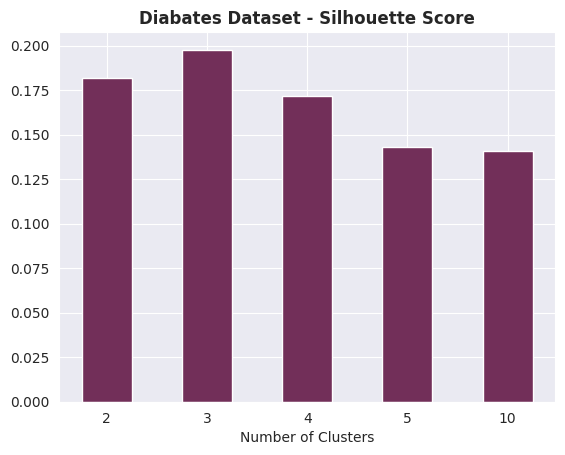

In [29]:
parameters = [2, 3, 4, 5, 10]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(n_init="auto", random_state=0)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)
    kmeans_model.fit(train_X)
    ss = silhouette_score(train_X, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Diabates Dataset - Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()


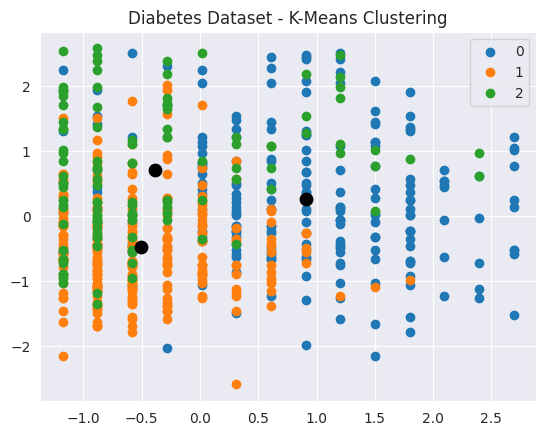

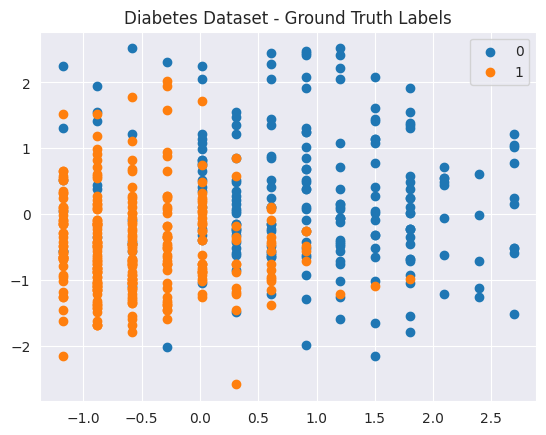

In [72]:
kmeans_model = KMeans(n_init="auto", n_clusters=3, random_state=0)
label = kmeans_model.fit_predict(train_X)
u_labels = np.unique(label)
centroids = kmeans_model.cluster_centers_

for i in u_labels:
  plt.scatter(train_X.values[label == i , 0] , train_X.values[label == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title("Diabetes Dataset - K-Means Clustering")
plt.show()


u_labels = np.unique(train_Y)

for i in u_labels:
  plt.scatter(train_X.values[label == i , 0] , train_X.values[label == i , 1] , label = i)
plt.legend()
plt.title("Diabetes Dataset - Ground Truth Labels")
plt.show()


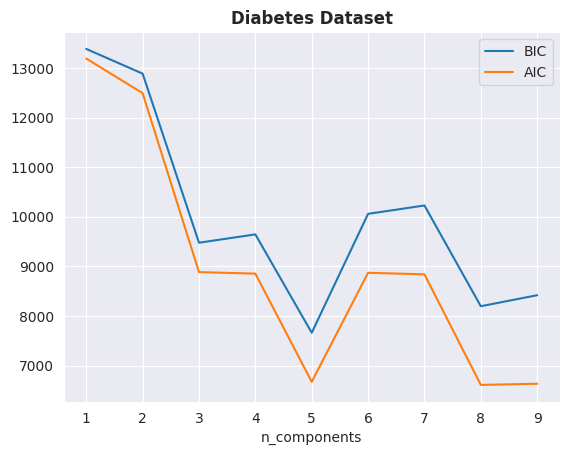

In [73]:
# model = GaussianMixture(n_components=2, init_params='random')
# model.fit(train_X)
# y_predict = model.predict(test_X)

n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', max_iter=100, random_state=0).fit(train_X)
          for n in n_components]

plt.plot(n_components, [m.bic(train_X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train_X) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('Diabetes Dataset', fontweight='bold')
plt.xlabel('n_components');

[0.27684677 0.20690732 0.13694391 0.11070536 0.09725275 0.06849536
 0.05510733 0.0477412 ]


Text(0.5, 1.0, 'Diabetes Dataset')

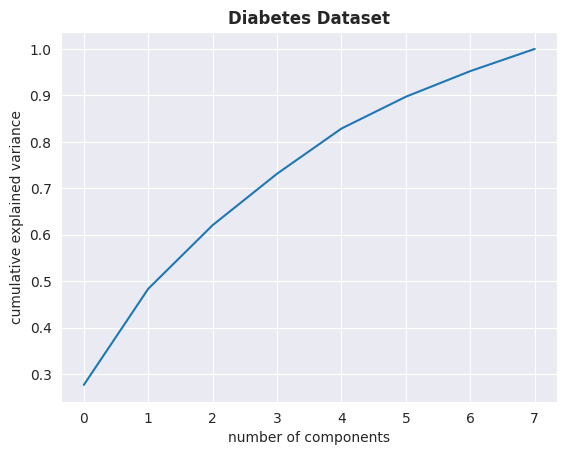

In [76]:
pca = PCA().fit(train_X)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Diabetes Dataset', fontweight='bold')


Text(0.5, 1.0, 'Diabetes Dataset')

<Figure size 640x480 with 0 Axes>

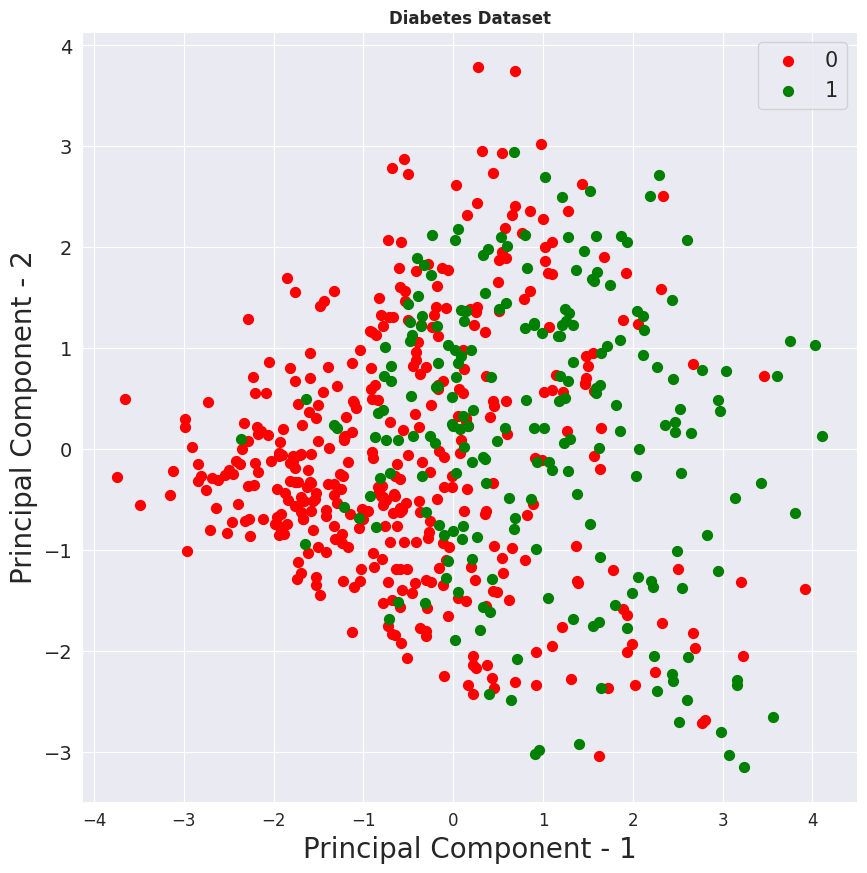

In [75]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(train_X)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = train_Y['Outcome'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.title('Diabetes Dataset', fontweight='bold')

In [ ]:
# n_components_list = [1, 2, 3, 4, 5, 6, 7, 8]
# kurtosis_values = []
# for n_components in n_components_list:
#   ica = FastICA(n_components, whiten='unit-variance', max_iter=1000, tol=0.1, random_state=1)
#   ica.fit(train_X)
#   ica_components = ica.transform(train_X)
#   kurtosis_values.append(np.mean(abs(kurtosis(ica_components, axis=0))))

# sorted_components = [comp for _, comp in sorted(zip(kurtosis_values, range(1, len(kurtosis_values) + 1)), reverse=True)]

# # Create a Component vs Kurtosis plot
# plt.figure()
# plt.plot(n_components_list, kurtosis_values, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Kurtosis')
# plt.title('Diabetes Dataset - Component vs Kurtosis Plot')
# plt.grid(True)

# # Display the sorted components
# print(f"Components sorted by kurtosis: {sorted_components}")

# plt.show()

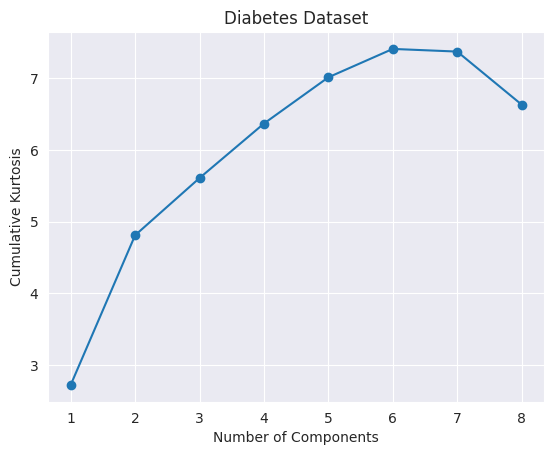

In [98]:

ica = FastICA(n_components=train_X.shape[1], whiten='unit-variance', max_iter=1000, tol=0.1, random_state=1)
ica.fit(train_X)
components = ica.transform(train_X)
kurtosis_values = np.apply_along_axis(lambda x: kurtosis(x), axis=0, arr=components)

# Sort components based on kurtosis
sorted_indices = np.argsort(kurtosis_values)[::-1]

# Calculate cumulative kurtosis
cumulative_kurtosis = np.cumsum(kurtosis_values[sorted_indices])

# Plot components vs cumulative kurtosis
plt.plot(range(1, len(cumulative_kurtosis) + 1), cumulative_kurtosis, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Kurtosis')
plt.title('Diabetes Dataset')
plt.show()

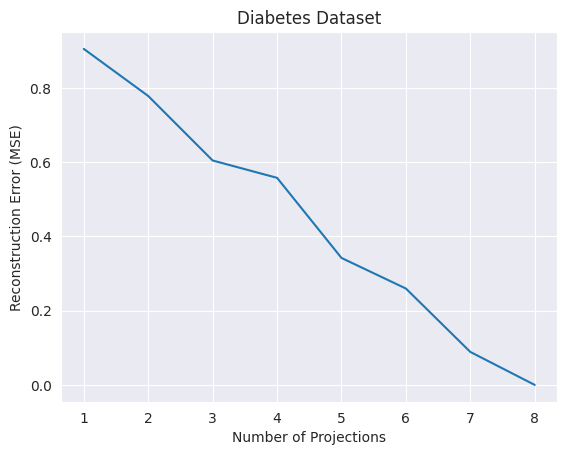

In [104]:
projection_errors = []
for n_projections in range(1, 9):
  random_projection = GaussianRandomProjection(n_components=n_projections)
  reduced_data = random_projection.fit_transform(train_X)
  # reconstructed_data = np.dot(reduced_data, np.linalg.pinv(random_projection.components_.T))
  reconstructed_data = random_projection.inverse_transform(reduced_data)
  # reconstructed_data = np.dot(reduced_data, random_projection.components_)
  mse = mean_squared_error(train_X, reconstructed_data)
  projection_errors.append(mse)

plt.plot(range(1, 9), projection_errors)
plt.xlabel('Number of Projections')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Diabetes Dataset')
plt.show()


In [36]:
# projection_errors = []
# lowest_reconstruction_error = float('inf')
# n_components_range = range(1, 9)
# for n_components in n_components_range:
#   tsne = TSNE(n_components=n_components, method="exact", random_state=1)
#   tsne_data = tsne.fit_transform(train_X)
#   pairwise_distances_tsne = pairwise_distances(tsne_data, metric="euclidean")
#   original_distances = pairwise_distances(train_X, metric="euclidean")

#   mse = mean_squared_error(original_distances, pairwise_distances_tsne)
#   projection_errors.append(mse)

# plt.plot(n_components_range, projection_errors)
# plt.xlabel('Number of Projections')
# plt.ylabel('Reconstruction Error (MSE)')
# plt.title('Diabetes Dataset - t-SNE')
# plt.show()

best_n_components is: 1
lowest_reconstruction_error is 0.2115172473031156


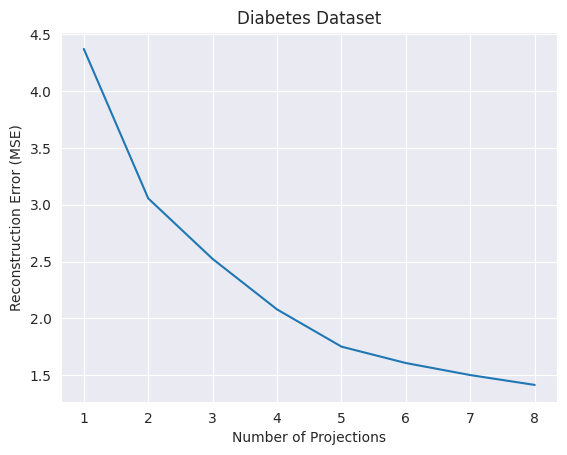

In [106]:
projection_errors = []
lowest_reconstruction_error = float('inf')
n_components_range = range(1, 9)
for n_components in n_components_range:
  isomap = Isomap(n_components=n_components, n_neighbors=30)
  isomap_data = isomap.fit_transform(train_X)
  projection_errors.append(isomap.reconstruction_error())

  if isomap.reconstruction_error() < lowest_reconstruction_error:
    best_n_components = n_components
    lowest_reconstruction_error = mse

print(f"best_n_components is: {best_n_components}")
print(f"lowest_reconstruction_error is {lowest_reconstruction_error}")
plt.plot(n_components_range, projection_errors)
plt.xlabel('Number of Projections')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Diabetes Dataset')
plt.show()

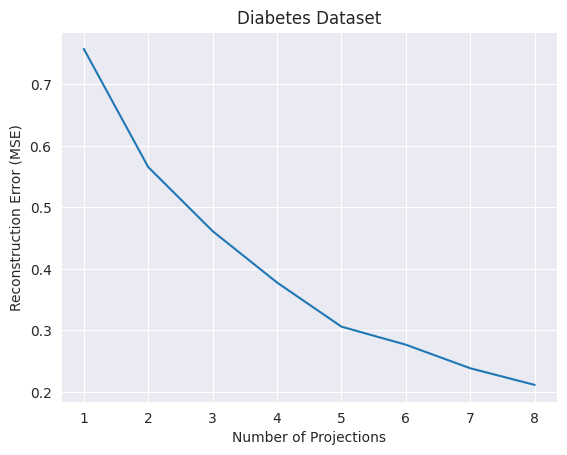

In [105]:
projection_errors = []
kernel = 'rbf'
gamma = 1.0
n_components_range = range(1, 9)
for n_components in n_components_range:
  kpca = KernelPCA(kernel=kernel, n_components=n_components, fit_inverse_transform=True)
  X_kpca = kpca.fit_transform(train_X)
  X_reconstructed = kpca.inverse_transform(X_kpca)
  mse = mean_squared_error(train_X, X_reconstructed)
  projection_errors.append(mse)

plt.plot(n_components_range, projection_errors)
plt.xlabel('Number of Projections')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Diabetes Dataset')
plt.show()

In [107]:
pca = PCA(n_components=6)
pca.fit(train_X)
train_X_pca = pca.transform(train_X)
test_X_pca = pca.transform(test_X)

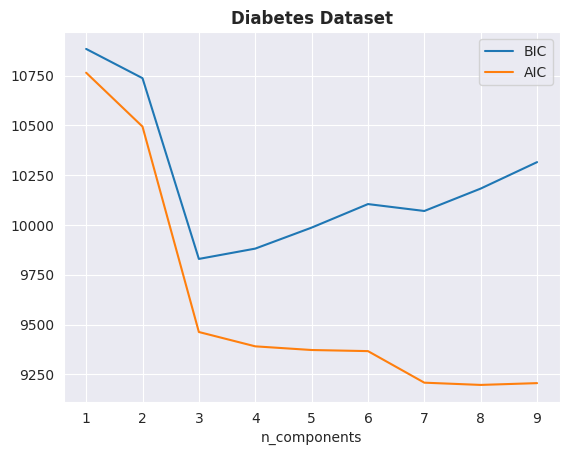

In [108]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', tol=0.001, max_iter=1000, random_state=0).fit(train_X_pca)
          for n in n_components]

plt.plot(n_components, [m.bic(train_X_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train_X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('Diabetes Dataset', fontweight='bold')
plt.xlabel('n_components');

In [41]:
# tsne = TSNE(n_components=4, method="exact", random_state=1).fit(train_X)
# train_X_tsne = tsne.fit_transform(train_X)
# test_X_tsne = tsne.fit(test_X)

In [42]:
kpca = KernelPCA(kernel=kernel, n_components=7).fit(train_X)
train_X_kpca = kpca.transform(train_X)
test_X_kpca = kpca.transform(test_X)


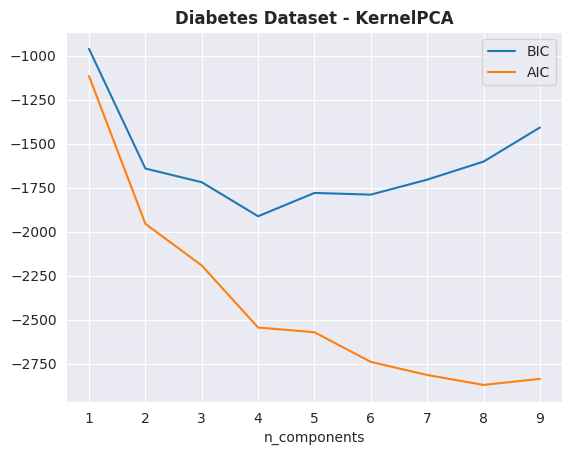

In [109]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', tol=0.001, max_iter=1000, random_state=0).fit(train_X_kpca)
          for n in n_components]

plt.plot(n_components, [m.bic(train_X_kpca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train_X_kpca) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('Diabetes Dataset - KernelPCA', fontweight='bold')
plt.xlabel('n_components');

In [110]:
def plot_validation_curve(clf, X, y, param_name, param_range, model_name):
    train_scores, test_scores = validation_curve(clf, X, y,
                                                 cv=4,
                                                 scoring="accuracy",
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 n_jobs=-1)
    plt.figure(figsize=(6,4))
    x_range = param_range
    train_scores_mean =  np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(x_range, train_scores_mean, 'g-', label='Training score')
    plt.plot(x_range, test_scores_mean, 'b-', label='Validation score')
    plt.ylabel('Accuracy Score')
    plt.xlabel(model_name + ": "+ param_name)
    # plt.text(6, 0.8, 'Overfitting',fontsize=12,color="r")
    # plt.text(1, 0.8, 'Underfitting',fontsize=12,color="r")
    plt.legend()
    plt.grid(True)

In [45]:
# random_projection = GaussianRandomProjection(n_components=6, random_state=0)
# reduced_data = random_projection.fit_transform(train_X)
# reduced_data_test = random_projection.fit_transform(test_X)

In [46]:
# pca = PCA(n_components=5)
# pca.fit(train_X)
# train_X_pca = pca.transform(train_X)
# test_X_pca = pca.transform(test_X)

ica = FastICA(6, whiten='unit-variance', max_iter=1000, tol=0.1, random_state=1)
ica.fit(train_X)
train_X_ica = ica.transform(train_X)
# ica.fit(test_X)
test_X_ica = ica.transform(test_X)

In [47]:
!pip install scikeras tensorflow
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
import keras

keras.utils.set_random_seed(2)

In [48]:
def buildclassifier(param):
    model = Sequential() #initialize NN
    print(param.shape[1])
    # model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01), input_dim =train_X.shape[1]))
    model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim =param.shape[1]))
    # model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    # model.add(Dense(units = 12, kernel_initializer = 'uniform',activation = 'relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
    # model.add(Dense(units = 8, kernel_initializer = 'uniform',activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    model.add(Dense(units = 10, kernel_initializer = 'uniform',activation = 'relu'))
    # model.add(Dense(units = 4, kernel_initializer = 'uniform',activation = 'relu'))
    # model.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    model.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))

    # print(model.summary())
    return model


6


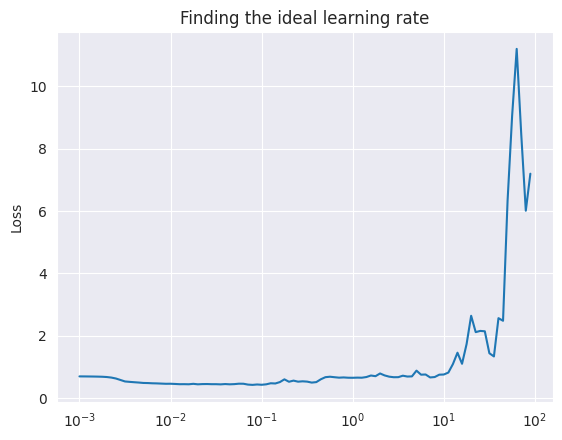

In [49]:
model = buildclassifier(train_X_ica)
optimizer = keras.optimizers.Adam()
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
history = model.fit(train_X_ica, train_Y, validation_split=0.2, epochs=100, batch_size = 64, verbose=0, callbacks=[lr_scheduler]);
lrs = 1e-3 * (10**(np.arange(100)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
# plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");
plt.show()

6


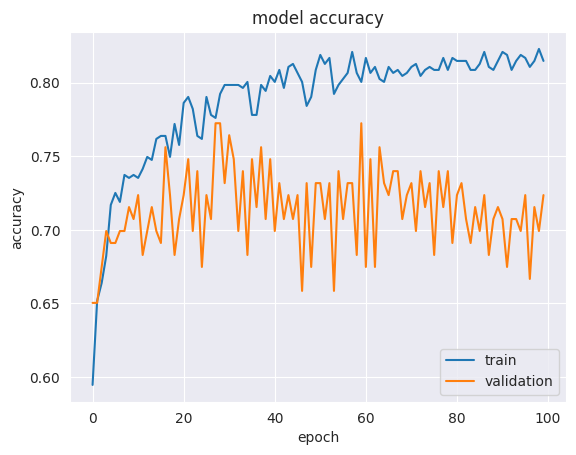

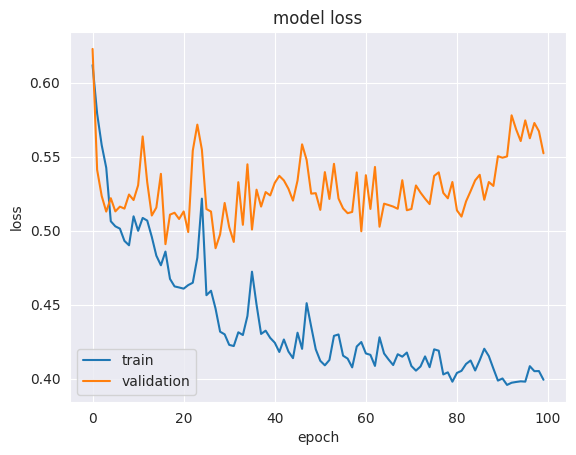

In [50]:
model = buildclassifier(train_X_ica)
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_X_ica, train_Y, validation_split=0.2, epochs=100, batch_size = 64, verbose=0);
# loss, accuracy = model.evaluate(reduced_data_test, test_Y)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()


6
5/5 [==============================] - 0s 3ms/step


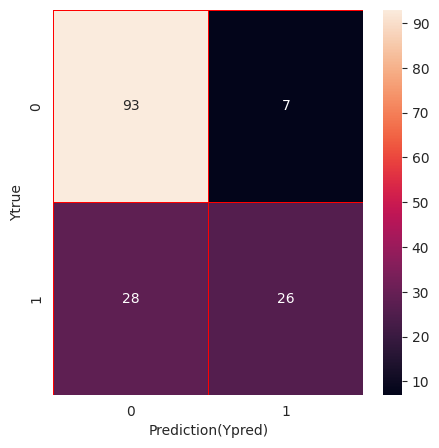

              precision    recall  f1-score   support

Not Diabetes     0.7686    0.9300    0.8416       100
    Diabetes     0.7879    0.4815    0.5977        54

    accuracy                         0.7727       154
   macro avg     0.7782    0.7057    0.7197       154
weighted avg     0.7754    0.7727    0.7561       154



In [51]:
model = buildclassifier(train_X_ica)
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(train_X_ica, train_Y, epochs=30, batch_size = 64, verbose=0);

Y_pred = model.predict(test_X_ica)
Y_pred = np.around(Y_pred)
CM = confusion_matrix(test_Y, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

print(classification_report(test_Y, Y_pred,
                            digits = 4,
                            target_names=["Not Diabetes",
                                         "Diabetes"]))




7


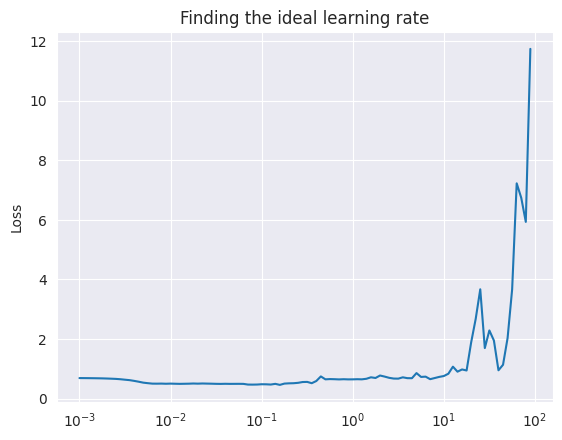

In [52]:
model = buildclassifier(train_X_kpca)
optimizer = keras.optimizers.Adam()
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
history = model.fit(train_X_kpca, train_Y, validation_split=0.2, epochs=100, batch_size = 64, verbose=0, callbacks=[lr_scheduler]);
lrs = 1e-3 * (10**(np.arange(100)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
# plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");
plt.show()

7


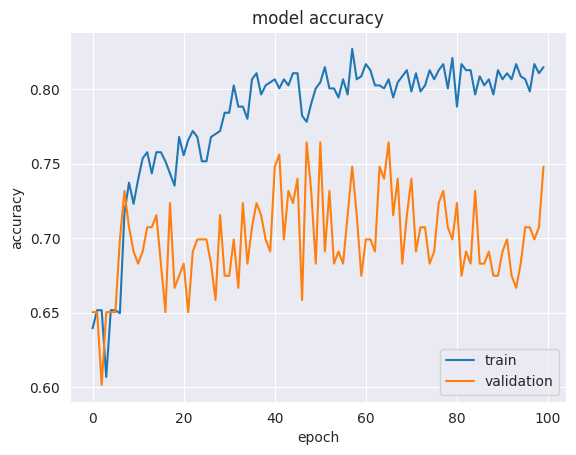

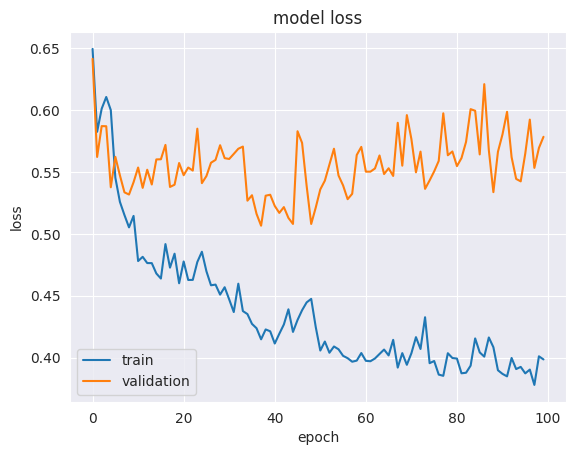

In [53]:
model = buildclassifier(train_X_kpca)
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_X_kpca, train_Y, validation_split=0.2, epochs=100, batch_size = 64, verbose=0);
# loss, accuracy = model.evaluate(reduced_data_test, test_Y)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

7
5/5 [==============================] - 0s 2ms/step


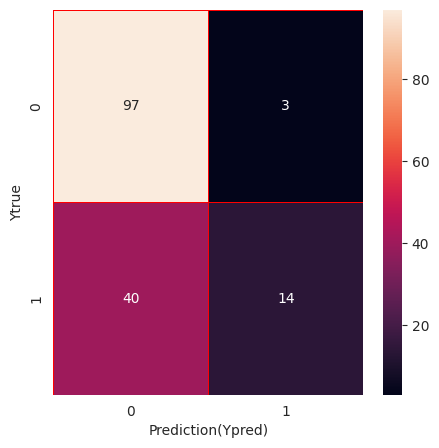

              precision    recall  f1-score   support

Not Diabetes     0.7080    0.9700    0.8186       100
    Diabetes     0.8235    0.2593    0.3944        54

    accuracy                         0.7208       154
   macro avg     0.7658    0.6146    0.6065       154
weighted avg     0.7485    0.7208    0.6698       154



In [54]:
model = buildclassifier(train_X_kpca)
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(train_X_kpca, train_Y, epochs=30, batch_size = 64, verbose=0);

Y_pred = model.predict(test_X_kpca)
Y_pred = np.around(Y_pred)
CM = confusion_matrix(test_Y, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

print(classification_report(test_Y, Y_pred,
                            digits = 4,
                            target_names=["Not Diabetes",
                                         "Diabetes"]))

In [55]:
kmeans_model_cluster_3 = KMeans(n_init="auto", n_clusters=2, random_state=0)
kmeans_model_cluster_3.fit(train_X)
labels_kmeans = kmeans_model_cluster_3.labels_

train_X_kmeans = train_X_ica.copy()
train_X_kmeans = pd.DataFrame(train_X_kmeans)
train_X_kmeans['labels1'] = labels_kmeans

labels_kmeans = kmeans_model_cluster_3.predict(test_X)
test_X_kmeans = test_X_ica.copy()
test_X_kmeans = pd.DataFrame(test_X_kmeans)
test_X_kmeans['labels1'] = labels_kmeans



In [56]:
guassian_model = GaussianMixture(2, covariance_type='full', max_iter=100, random_state=0)
guassian_model.fit(train_X)
labels_guassian = guassian_model.predict(train_X)

train_X_guassian = train_X_ica.copy()
train_X_guassian = pd.DataFrame(train_X_guassian)
train_X_guassian['labels2']=labels_guassian

labels_guassian = guassian_model.predict(test_X)
test_X_guassian = test_X_ica.copy()
test_X_guassian = pd.DataFrame(test_X_guassian)
test_X_guassian['labels2'] = labels_guassian


7


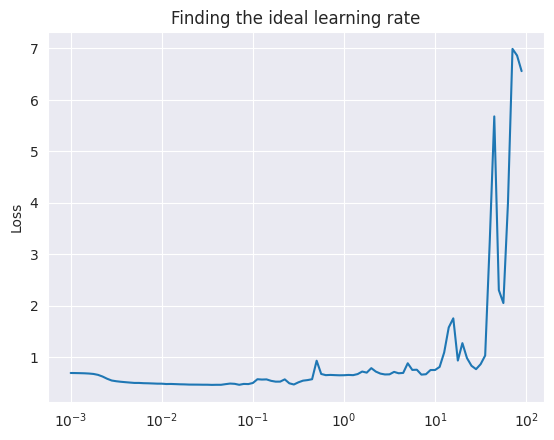

In [57]:
model = buildclassifier(train_X_kmeans)
optimizer = keras.optimizers.Adam()
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
history = model.fit(train_X_kmeans, train_Y, validation_split=0.2, epochs=100, batch_size = 64, verbose=0, callbacks=[lr_scheduler]);
lrs = 1e-3 * (10**(np.arange(100)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
# plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");
plt.show()

7


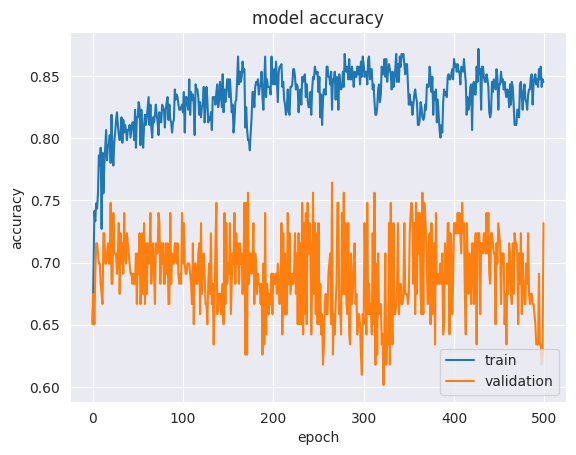

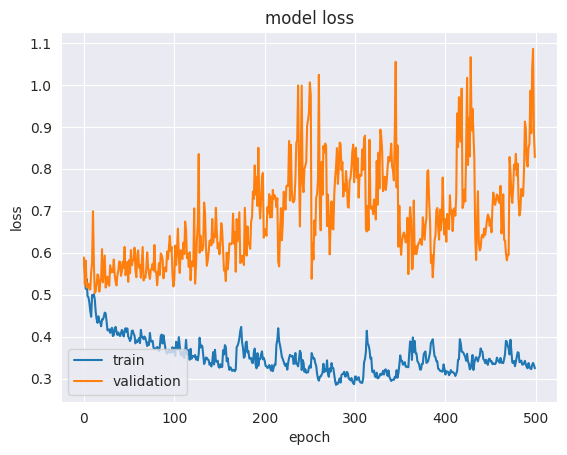

In [58]:
model = buildclassifier(train_X_kmeans)
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_X_kmeans, train_Y, validation_split=0.2, epochs=500, batch_size = 64, verbose=0);
# loss, accuracy = model.evaluate(reduced_data_test, test_Y)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

7
5/5 [==============================] - 0s 2ms/step


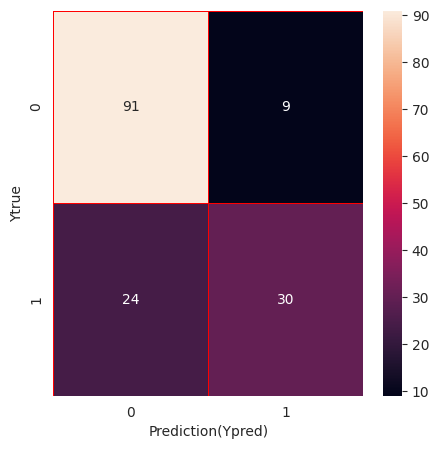

              precision    recall  f1-score   support

Not Diabetes     0.7913    0.9100    0.8465       100
    Diabetes     0.7692    0.5556    0.6452        54

    accuracy                         0.7857       154
   macro avg     0.7803    0.7328    0.7458       154
weighted avg     0.7836    0.7857    0.7759       154



In [59]:
model = buildclassifier(train_X_kmeans)
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(train_X_kmeans, train_Y, validation_split=0.2, epochs=50, batch_size = 64, verbose=0);

Y_pred = model.predict(test_X_kmeans)
Y_pred = np.around(Y_pred)
CM = confusion_matrix(test_Y, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

print(classification_report(test_Y, Y_pred,
                            digits = 4,
                            target_names=["Not Diabetes",
                                         "Diabetes"]))


7


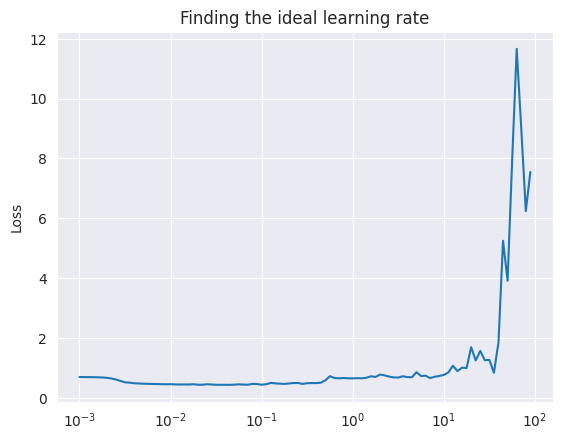

In [60]:
model = buildclassifier(train_X_guassian)
optimizer = keras.optimizers.Adam()
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
history = model.fit(train_X_guassian, train_Y, validation_split=0.2, epochs=100, batch_size = 64, verbose=0, callbacks=[lr_scheduler]);
lrs = 1e-3 * (10**(np.arange(100)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
# plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");
plt.show()

7


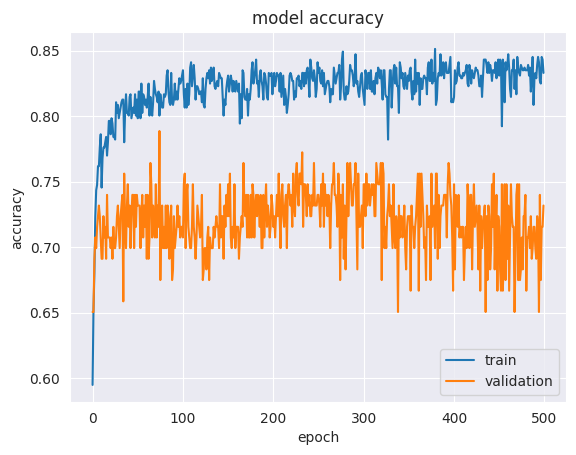

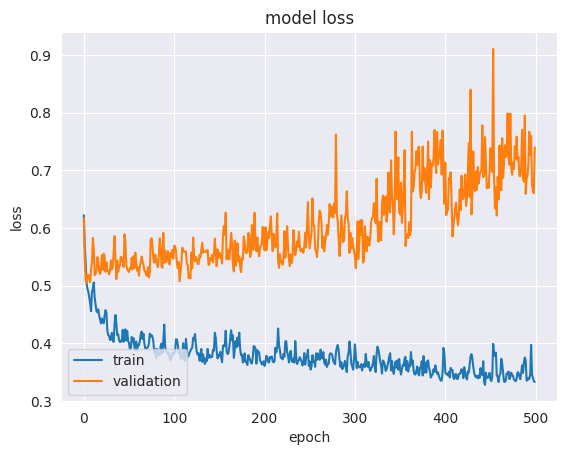

In [61]:
model = buildclassifier(train_X_guassian)
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_X_guassian, train_Y, validation_split=0.2, epochs=500, batch_size = 64, verbose=0);
# loss, accuracy = model.evaluate(reduced_data_test, test_Y)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

7
5/5 [==============================] - 0s 2ms/step


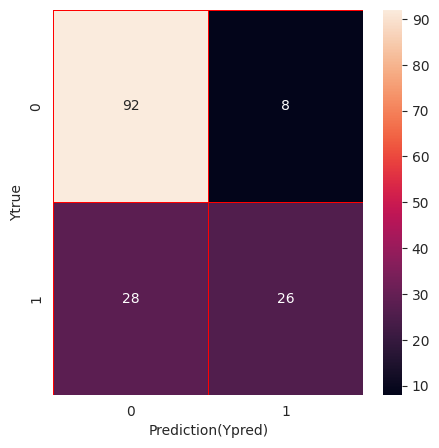

              precision    recall  f1-score   support

Not Diabetes     0.7667    0.9200    0.8364       100
    Diabetes     0.7647    0.4815    0.5909        54

    accuracy                         0.7662       154
   macro avg     0.7657    0.7007    0.7136       154
weighted avg     0.7660    0.7662    0.7503       154



In [62]:
model = buildclassifier(train_X_guassian)
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(train_X_guassian, train_Y, validation_split=0.2, epochs=100, batch_size = 64, verbose=0);

Y_pred = model.predict(test_X_guassian)
Y_pred = np.around(Y_pred)
CM = confusion_matrix(test_Y, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

print(classification_report(test_Y, Y_pred,
                            digits = 4,
                            target_names=["Not Diabetes",
                                         "Diabetes"]))